# Natural Language Processing
### Assignment 1
The assignment consists in the development, in NLTK, OpenNLP, SketchEngine or GATE/Annie a Naïve Bayes Classifier able to detect a single class in one of the corpora available as attachments to the chosen package, by distinguishing ENGLISH against NON-ENGLISH. In particular the classifier has to be:

1. Trained on a split subset of the chosen corpus, by either using an existing partition between sample documents for training and for test or by using a random splitter among the available ones;

2. Devised as a pipeline of any chosen format, including the simplest version based on word2vec on a list of words obtained by one of the available lexical resources.

The test of the classifier shall give out the measures of accuracy, precision, recall on the obtained confusion matrix and WILL NOT BE EVALUATED ON THE LEVEL OF THE PERFORMANCES. In other terms, when the confusion is produced, then the value of the assignment will be good, independently of the percentage of false positive and negative results.

Deliver a short set of comments on the experience (do not deliver the entire code, but link it on a public repository like GitHub or the GATE Repo).  
 Discuss: size of the corpus, size of the split training and test sets, performance indicators employed and their nature, employability of the classifier as a Probabilistic Language Model.


### Comments

For this assignment I've chosen english, italian, dutch and finnish corpora from 'Sample European Parliament Proceedings Parallel Corpus' which contain extracts of speeches from the european parliament in different languages. 

In the fist part I analyzed The Naive Bayes Classifier passing it token, and in the second part I analized it passing it sentences.

to analyze the size of the corpus: 
1. in the fist part I have 243416 english tokens and 823843 not english tokens 
2. in the second part I have 20095 english sentences and 65480 not english sentences

### Imports and download

I import all the packages that include corpora, tokenizer, lemmatizer, stemmer and stopwords, string, FreqDist, panda, numpy, random, train_test_split, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, f1_score NaiveBayesClassifier and download the chosen corpus

In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import pandas as pd
import numpy as np
import random
from nltk.stem.snowball import SnowballStemmer
from nltk import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import ConfusionMatrixDisplay
from nltk import NaiveBayesClassifier
from sklearn.metrics import f1_score as f1

In [2]:
nltk.download('europarl_raw')
nltk.download("stopwords")

[nltk_data] Downloading package europarl_raw to C:\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

I import the english, italian, dutch and finnish corpora and join all the words that componed them in one text for each language

In [3]:
from nltk.corpus import europarl_raw
testoING = ' '.join(europarl_raw.english.words())
testoITA= ' '.join(europarl_raw.italian.words())
testoDUTCH= ' '.join(europarl_raw.dutch.words())
testoFINNISH= ' '.join(europarl_raw.finnish.words())

In [4]:
testoING = testoING.lower()
testoITA = testoITA.lower()
testoDUTCH = testoDUTCH.lower()
testoFINNISH = testoFINNISH.lower()

### Tokens part

I divide the text of every language in token 

In [5]:
t_wordITA = word_tokenize(testoITA)
t_wordING = word_tokenize(testoING)
t_wordDUTCH = word_tokenize(testoDUTCH)
t_wordFINNISH = word_tokenize(testoFINNISH)

I remove the stopwords, the puntuaction and the numbers 

In [6]:
ST = set(stopwords.words("english")+list(string.punctuation))
ST_ita = set(stopwords.words("italian")+list(string.punctuation))
ST_dutch = set(stopwords.words("dutch")+list(string.punctuation))
ST_finnish = set(stopwords.words("finnish")+list(string.punctuation))

In [7]:
f_ING = [word for word in t_wordING if word not in ST]
f_listING = [word for word in f_ING if word.isalpha()]

f_ITA = [word for word in t_wordITA if word not in ST_ita]
f_listITA = [word for word in f_ITA if word.isalpha()]

f_DUTCH = [word for word in t_wordDUTCH if word not in ST_dutch]
f_listDUTCH = [word for word in f_DUTCH if word.isalpha()]

f_FINNISH = [word for word in t_wordFINNISH if word not in ST_finnish]
f_listFINNISH = [word for word in f_FINNISH if word.isalpha()]

I do the stemming of the words

In [8]:
stemmer = PorterStemmer()

In [9]:
Pstemmed_wordsING = [stemmer.stem(word) for word in f_listING]
Pstemmed_wordsITA = [stemmer.stem(word) for word in f_listITA]
Pstemmed_wordsDUTCH = [stemmer.stem(word) for word in f_listDUTCH]
Pstemmed_wordsFINNISH = [stemmer.stem(word) for word in f_listFINNISH]

I do the lemmatization of the stemmed words

In [10]:
lemmatizerITA = WordNetLemmatizer()
lemmatizerING = WordNetLemmatizer()
lemmatizerDUTCH = WordNetLemmatizer()
lemmatizerFINNISH = WordNetLemmatizer()

Plemmatized_wordsING = [lemmatizerING.lemmatize(a) for a in Pstemmed_wordsING]

Plemmatized_wordsITA = [lemmatizerITA.lemmatize(a) for a in Pstemmed_wordsITA]

Plemmatized_wordsDUTCH = [lemmatizerDUTCH.lemmatize(a) for a in Pstemmed_wordsDUTCH]

Plemmatized_wordsFINNISH = [lemmatizerFINNISH.lemmatize(a) for a in Pstemmed_wordsFINNISH]

I calculate the frequency distribution for each text just processed 

In [11]:
frequency_distributionING = FreqDist(Plemmatized_wordsING)
frequency_distributionITA = FreqDist(Plemmatized_wordsITA)
frequency_distributionDUTCH = FreqDist(Plemmatized_wordsDUTCH)
frequency_distributionFINNISH = FreqDist(Plemmatized_wordsFINNISH)

I create dataframes

In [12]:
df_ING = pd.DataFrame(Plemmatized_wordsING)
df_ITA = pd.DataFrame(Plemmatized_wordsITA)
df_DUTCH = pd.DataFrame(Plemmatized_wordsDUTCH)
df_FINNISH = pd.DataFrame(Plemmatized_wordsFINNISH)

Every token is labelized with corresponding 'English' or 'Not English' label 

In [13]:
df_ING=df_ING.assign(Expected = 'English')
df_ITA=df_ITA.assign(Expected = 'Not English')
df_DUTCH=df_DUTCH.assign(Expected = 'Not English')
df_FINNISH=df_FINNISH.assign(Expected = 'Not English')

I merge all dataframes into one dataframe

In [14]:
df = df_ING.append(df_ITA)
df = df.append(df_DUTCH)
df = df.append(df_FINNISH)

C:\Users\Serena\AppData\Local\Temp\ipykernel_1780\1910452062.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_ING.append(df_ITA)
C:\Users\Serena\AppData\Local\Temp\ipykernel_1780\1910452062.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_DUTCH)
C:\Users\Serena\AppData\Local\Temp\ipykernel_1780\1910452062.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_FINNISH)


I shuffle the rows of the dataframe

In [15]:
df = df.sample(frac = 1)

I create the required dictionary as a parameter from the Naive Bayes Classifier

In [16]:
df_list = df.values.tolist()

In [17]:
new = [[{"token":e[0]}, e[1]] for e in df_list]

I splitted my dataset in 70% train and 30% test

In [18]:
train, test = train_test_split(new, random_state=104, test_size=0.3, shuffle=True)

I train the data

In [19]:
classifier = nltk.NaiveBayesClassifier.train(train) 

In [20]:
pred = []
true = []
#pred= np.empty(0)
for x,y in test:
    a = classifier.classify(x)
    pred.append(a)
    true.append(y)

In [21]:
pred_N = []
y_true_N = []
L = len(pred)
for i in range(L):
    if pred[i]=="English": pred_N.append(1)
    else: pred_N.append(0)
    if true[i]=="English": y_true_N.append(1)
    else: y_true_N.append(0)

I compute accuracy, precision, recall and F1:

**Accuracy :** the ratio of correctly classified items (True positive + True Negative) to the total number of items (True Positive + True Negative + False Positive + False Negative).

$$Accuracy\frac{true positives+true negatives}{true positives+false positives + true negatives + false negatives}$$

**Precision :** % of items the system detected (i.e., items the system labeled as positive) that are in fact positive (according to the human gold labels).

$$Precision=\frac{true positives}{true positives+false positives}$$

**Recall :**% of items actually present in the input that were correctly identified by the system. 

$$Recall=\frac{true positives}{true positives+false negatives}$$

**F1 :** the equilibrium between the precision and the recall.

$$F1=\frac{2*Precision*Recall}{Precision+Recall}$$




I first calculate the accuracy value with the function from nltk

In [22]:
print('Accuracy: {:4.3f}'.format(nltk.classify.accuracy(classifier, test))) 

Accuracy: 0.969


after, I use accuracy, precision, recall function from sklearn

In [23]:
print(f"ACCURACY: {ACC(y_true_N, pred_N)}")
print(f"PRECISION: {PR(y_true_N, pred_N)}")
print(f"RECALL: {RC(y_true_N, pred_N)}")
print(f"F1: {f1(y_true_N, pred_N)}")

ACCURACY: 0.9690390970022925
PRECISION: 0.9428852920478537
RECALL: 0.9196260655895232
F1: 0.9311104470558802


I compute and display the Confusion Matrix

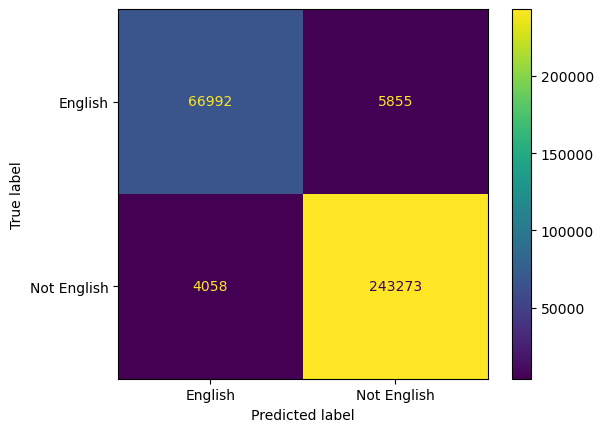

In [24]:
ConfusionMatrixDisplay.from_predictions( true, pred, display_labels=["English", "Not English"] )

I create a function that return the percentage of words of our text that is contained in the Snowball dictionary, respect to the length of my text

In [27]:
def function(diz, text):
    count = 0
    mancante = 0
    lunghezza = len(text)
    aux = 0
    for i in text:
        if i in diz: count+=1
    perc_pickup = count/lunghezza
    print(perc_pickup)

I test my function with english Snowball dictionary and my english text, I can notate that if I pass at the function the english text the similarity is 90% , if I pass at the function the finnish text the similarity near 1%

In [29]:
filename = 'C:\\Users\\Serena\\Desktop\\UNIVR\\NLP\\snowball_data\\english\\output.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)

In [30]:
function(data,Plemmatized_wordsING)

0.9013704933118611


In [31]:
function(data,Plemmatized_wordsFINNISH)

0.016364995169610472


### Sentences part

I divide the text of every language in sentences

In [32]:
testo_sentING = sent_tokenize(testoING)
testo_sentITA = sent_tokenize(testoITA)
testo_sentDUTCH = sent_tokenize(testoDUTCH)
testo_sentFINNISH = sent_tokenize(testoFINNISH)

I tokenize the words for each sentence

In [33]:
testo_wordING = [word_tokenize(s) for s in testo_sentING]
testo_wordITA = [word_tokenize(s) for s in testo_sentITA]
testo_wordDUTCH = [word_tokenize(s) for s in testo_sentDUTCH]
testo_wordFINNISH = [word_tokenize(s) for s in testo_sentFINNISH]

I remove stop words, puntuaction and numbers

In [34]:
filtered_ING = [[word for word in s if word.casefold() not in ST] for s in testo_wordING]
filtered_listING = [[ word for word in s if word.isalpha()]for s in filtered_ING]

filtered_ITA = [[word for word in s if word.casefold() not in ST_ita] for s in testo_wordITA]
filtered_listITA = [[ word for word in s if word.isalpha()]for s in filtered_ITA]

filtered_DUTCH = [[word for word in s if word.casefold() not in ST_dutch] for s in testo_wordDUTCH]
filtered_listDUTCH = [[ word for word in s if word.isalpha()]for s in filtered_DUTCH]

filtered_FINNISH = [[word for word in s if word.casefold() not in ST_finnish] for s in testo_wordFINNISH]
filtered_listFINNISH = [[ word for word in s if word.isalpha()]for s in filtered_FINNISH]

I do stemming and lemmatization

In [35]:
stemmed_wordsING=SnowballStemmer('english')
stemmed_wordsITA=SnowballStemmer('italian')
stemmed_wordsDUTCH=SnowballStemmer('dutch')
stemmed_wordsFINNISH=SnowballStemmer('finnish')

In [36]:
lemmatized_wordsING = WordNetLemmatizer()
lemmatized_wordsITA = WordNetLemmatizer()
lemmatized_wordsDUTCH = WordNetLemmatizer()
lemmatized_wordsFINNISH = WordNetLemmatizer()

In [37]:
array_sent_tokensING = [[ lemmatized_wordsING.lemmatize(stemmed_wordsING.stem(word)) for word in s ] for s in filtered_listING ]
array_sent_tokensITA = [[ lemmatized_wordsITA.lemmatize(stemmed_wordsITA.stem(word)) for word in s ] for s in filtered_listITA ]
array_sent_tokensDUTCH = [[ lemmatized_wordsDUTCH.lemmatize(stemmed_wordsDUTCH.stem(word)) for word in s ] for s in filtered_listDUTCH ]
array_sent_tokensFINNISH= [[ lemmatized_wordsFINNISH.lemmatize(stemmed_wordsFINNISH.stem(word)) for word in s ] for s in filtered_listFINNISH ]

In [38]:
english = Plemmatized_wordsING
not_english = Plemmatized_wordsITA + Plemmatized_wordsDUTCH + Plemmatized_wordsFINNISH

I calculate the frequency distribution and create a list of the most 2000 common words

In [39]:
frequency_distribution = FreqDist(Plemmatized_wordsING)+FreqDist(Plemmatized_wordsITA)+FreqDist(Plemmatized_wordsDUTCH)

In [40]:
most_common = list(frequency_distribution)[:2000]

I create a function that return True or False for each word in our sentence if this word is in most common words list

In [41]:
def occurrences(sentence):
    return {f'contains({word})': (word in set(sentence)) for word in most_common}

I merge all arrays of non-English languages into one array

In [42]:
array_sent_non_eng = array_sent_tokensITA + array_sent_tokensDUTCH + array_sent_tokensFINNISH

For create my dataset:
1. I attribute the labels = {"ENGLISH": 1, "NON-ENGLISH": 0}
2. I create two arrays in which in one is contained as many ones as the length of english preprocessed text and in the other is contained as many zeros as the length of not english preprocessed texts
3. I create two arrays using occurences(sentence) function for each phrase in my array of tokenized sentences
4. I create my two datasets (english_dataset and not_english_dataset) merging the two vectors just create in a dictionary 

In [43]:
label_one = [1] * len(english)
occurrences_eng = [occurrences(p) for p in array_sent_tokensING]
english_dataset= list(zip(occurrences_eng, label_one))

In [44]:
label_zero = [0] * len(not_english)
occurrences_not_eng = [occurrences(p) for p in array_sent_non_eng]
not_english_dataset= list(zip(occurrences_not_eng, label_zero))

I merge all dataset into one dataset

In [45]:
dataset=english_dataset+not_english_dataset

I shuffle my dataset

In [46]:
random.shuffle(dataset)

I splitted my dataset in 70% train and 30% test

In [47]:
X_train, X_test = train_test_split(dataset, random_state=104, test_size=0.3, shuffle=True)

 I train the datas

In [48]:
classifier = nltk.NaiveBayesClassifier.train(X_train) 

In [49]:
y_pred = [classifier.classify(f) for (f, label) in X_test]
y_true = [label for (f, label) in X_test]

I compute accuracy, precision, recall and F1:

In [50]:
print(f"ACCURACY: {ACC(y_true, y_pred)}")
print(f"PRECISION: {PR(y_true, y_pred)}")
print(f"RECALL: {RC(y_true, y_pred)}")
print(f"F1: {f1(y_true, y_pred)}")

ACCURACY: 0.9915864916449187
PRECISION: 0.9989762839105955
RECALL: 0.9653751030502885
F1: 0.9818883112527251


I calculate the accuracy value with the function from nltk

In [51]:
print('Accuracy: {:4.3f}'.format(nltk.classify.accuracy(classifier, X_test))) 

Accuracy: 0.992


I compute and display the Confusion Matrix

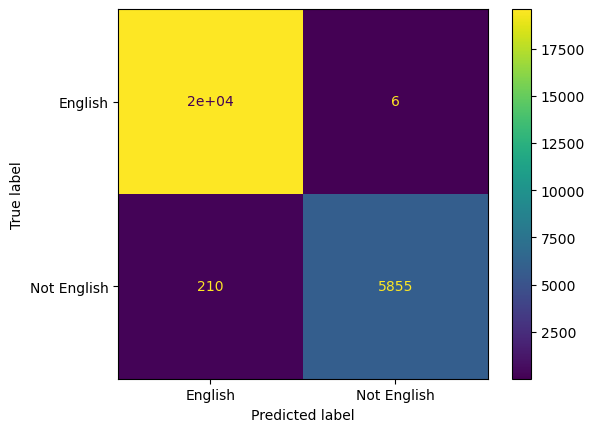

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["English", "Not English"])

### Answers

1. Size of the corpus, size of the split training and test sets: 
    I select 4 corpora: english, italian, dutch and finnish
    the classifier analizes in the first part tokens and in the second part sentences:
    - in the fist part I have 243416 english tokens and 823843 not english tokens 
    - in the second part I have 20095 english sentences and 65480 not english sentences
    I I splitted my dataset in 70% train and 30% test
2. Performance indicators employed and their nature:  F1 studies the equilibrium between the precision and the recall, so
    it is the best metric to understand the performance of a model in classification problems: 
3. Employability of the classifier as a Probabilistic Language Model: The classifier return reliable result. 
    My Naive Bayes Classifier is now able to classify:
    - in the fist case the probability of token to belong to an 'ENGLSH' or to a 'NON ENGLISH' class
    - in the second case the probability of sentence to belong to an 'ENGLSH' or to a 'NON ENGLISH' class.  
During training phase it learns the most common words belong to each class and with testing it calculates:
    - in the first case the probability that a token is in one class instead the other.
    - in the first case the probability that a sentence is in one class instead the other.